In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archives_by_nfe = pd.read_csv('../output/SE_10_hypervolume.csv')
archives_by_nfe

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,-29.561951,-1.403085e-01,-8.774644e-02,-1.114060e-01,0.148138,-0.892857
1,100,1,-50.634056,-5.884411e-01,-2.638458e-01,-3.070024e-01,0.082599,-1.000000
2,100,2,-7.372961,-5.818062e-02,-4.250875e-01,-3.818843e-01,0.309795,-0.892857
3,100,3,-6.895472,-2.378362e-09,-1.988326e-08,-1.749737e-08,0.452055,-0.750000
4,100,4,-15.302259,-1.606611e-01,-9.063533e-02,-6.543638e-02,0.235883,-0.821429
...,...,...,...,...,...,...,...,...
15438,10618,201,-29.717285,-7.762686e-01,-4.603730e-01,-5.099613e-01,0.325466,-0.964286
15439,10618,202,-45.570741,-4.383619e-01,-1.678751e-01,-1.847176e-01,0.262698,-0.892857
15440,10618,203,-39.049866,-7.696002e-01,-5.696703e-01,-5.226117e-01,0.202497,-0.857143
15441,10618,204,-41.801079,-3.402262e-01,-3.428619e-01,-3.091915e-01,0.292287,-0.892857


In [3]:
from platypus import Solution, Problem

n_rbfs = 4
n_objs = 6
n_vars = n_rbfs * 8 

problem = Problem(n_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MINIMIZE  # hydropower
problem.directions[1] = Problem.MINIMIZE  # atomicpowerplant
problem.directions[2] = Problem.MINIMIZE  # baltimore
problem.directions[3] = Problem.MINIMIZE  # chester
problem.directions[4] = Problem.MAXIMIZE  # environment
problem.directions[5] = Problem.MINIMIZE  # recreation

archives = {}
for nfe, generation in archives_by_nfe.groupby("Unnamed: 0"):
    # we slice from 2, getting rid of the first two columns 
    # which contain the NFE and ID of each solution
    archive = []
    for i, row in generation.iloc[:, 2::].iterrows():
        solution = Solution(problem)
        solution.objectives = row
        archive.append(solution)
    archives[nfe] = archive
        

In [4]:
data = pd.read_csv('../output/SE_10_solution.csv')

ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row
    ref_set.append(solution)

In [5]:
from platypus import GenerationalDistance

gd = GenerationalDistance(reference_set=ref_set)
nfes = []
gds = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    gds.append(gd.calculate(archive))

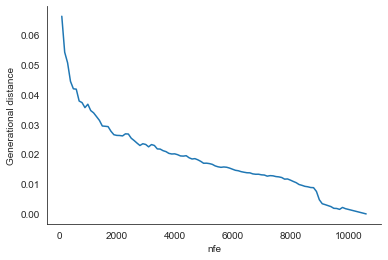

In [8]:
sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, gds)
ax.set_xlabel('nfe')
ax.set_ylabel('Generational distance')

sns.despine()

plt.show()

In [9]:
from platypus import InvertedGenerationalDistance

igd = InvertedGenerationalDistance(reference_set=ref_set)
nfes = []
igds = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    igds.append(igd.calculate(archive))

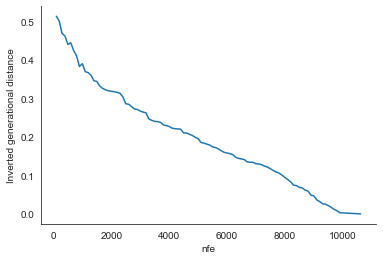

In [10]:
sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, igds)
ax.set_xlabel('nfe')
ax.set_ylabel('Inverted generational distance')

sns.despine()

plt.show()